In [2]:
import pandas as pd
import numpy as np

In [2]:
ser_obj = pd.Series(range(10, 20))
print(ser_obj)

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64


In [3]:
# 获取数据
print(ser_obj.values)  #values实际是ndarray
print(type(ser_obj.values))  #类型是ndarray
# 获取索引
print(ser_obj.index)  #内部自带的类型--RangeIndex
ser_obj.dtype

[10 11 12 13 14 15 16 17 18 19]
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=10, step=1)


dtype('int64')

In [4]:
print(ser_obj[0])
ser_obj[9]  #
# 访问不存在的索引下标会报keyerror

10


np.int64(19)

In [5]:
print(ser_obj * 2)
print(ser_obj > 15)


0    20
1    22
2    24
3    26
4    28
5    30
6    32
7    34
8    36
9    38
dtype: int64
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool


In [8]:
# 通过dict构建Series
year_data = {2001: 17.8, 2002: 20.1, 2003: 16.5}
ser_obj2 = pd.Series(year_data)
print(ser_obj2)
print(ser_obj2.index)
print(ser_obj2[2001])

2001    17.8
2002    20.1
2003    16.5
dtype: float64
Index([2001, 2002, 2003], dtype='int64')
17.8


In [9]:
#有点鸡肋
print(ser_obj2.name)  #Series名字
print(ser_obj2.index.name)  #索引名字
ser_obj2.name = 'temp'
ser_obj2.index.name = 'year1'
print('-' * 50)
print(ser_obj2.head())  #head默认显示前5行

None
None
--------------------------------------------------
year1
2001    17.8
2002    20.1
2003    16.5
Name: temp, dtype: float64


In [10]:
t = pd.DataFrame(np.arange(12).reshape((3, 4)))  #默认索引是0-2
print(t)
print('-' * 50)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
--------------------------------------------------


In [11]:
array = np.random.randn(5, 4)
print(array)
print('-' * 50)
df_obj = pd.DataFrame(array)
print(df_obj.head())  #默认显示前5行

[[-2.61133544 -1.27053097  0.07285142  0.86986323]
 [ 0.25828913 -0.66479145 -0.75816169 -1.84749768]
 [-0.56971805  0.64898084 -0.09415107 -0.43642876]
 [-0.9147446  -1.50350764  0.01954264 -0.08395839]
 [-0.00932987 -0.68760368  0.79901649 -0.01637435]]
--------------------------------------------------
          0         1         2         3
0 -2.611335 -1.270531  0.072851  0.869863
1  0.258289 -0.664791 -0.758162 -1.847498
2 -0.569718  0.648981 -0.094151 -0.436429
3 -0.914745 -1.503508  0.019543 -0.083958
4 -0.009330 -0.687604  0.799016 -0.016374


In [12]:
t.loc[0]  #单独把某一行取出来,类型是series

0    0
1    1
2    2
3    3
Name: 0, dtype: int64

In [13]:
d2 = [{"name": "xiaohong", "age": 32, "tel": 10010},
      {"name": "xiaogang", "tel": 10000},
      {"name": "xiaowang", "age": 22}]
df6 = pd.DataFrame(d2)
print(df6)  #缺失值会用NaN填充
print(type(df6.values))  #ndarray

       name   age      tel
0  xiaohong  32.0  10010.0
1  xiaogang   NaN  10000.0
2  xiaowang  22.0      NaN
<class 'numpy.ndarray'>


In [14]:
pd.Series(1, index=list(range(3, 7)), dtype='float32')

3    1.0
4    1.0
5    1.0
6    1.0
dtype: float32

In [15]:
#df中不同列可以是不同的数据类型,同一列必须是一个数据类型
import pandas as pd
import numpy as np

dict_data = {'A': 1,
             'B': pd.Timestamp('20190926'),
             'C': pd.Series(1, index=list(range(4)), dtype='float32'),
             'D': np.array([1, 2, 3, 4], dtype='int32'),
             'E': ["Python", "Java", "C++", "C"],
             'F': 'wangdao'}
df_obj2 = pd.DataFrame(dict_data)
print(df_obj2)

   A          B    C  D       E        F
0  1 2019-09-26  1.0  1  Python  wangdao
1  1 2019-09-26  1.0  2    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  4       C  wangdao


In [16]:
print(df_obj2.index)  #行索引,重点
#不可改变
# df_obj2.index[0]=2  不可以单独修改某个索引值
print(df_obj2.columns)  #列索引，重点
df_obj2.dtypes  #每一列的数据类型，重点

Index([0, 1, 2, 3], dtype='int64')
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


A            int64
B    datetime64[s]
C          float32
D            int32
E           object
F           object
dtype: object

In [17]:
# 感受日期,初始化df，设置行索引，列索引
dates = pd.date_range('20130101', periods=6)  #默认freq='D'，即天
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)
print('-' * 50)
print(df.index)

                   A         B         C         D
2013-01-01  0.229101 -0.092735 -0.464707  0.619139
2013-01-02 -0.248893  0.396537 -0.436350 -0.737482
2013-01-03 -1.304176 -0.399415 -0.716253 -0.902696
2013-01-04  0.975542  0.511531  0.620195  0.910228
2013-01-05  0.376300 -2.910673  0.235085 -1.650460
2013-01-06 -0.120734  0.990697 -0.874154 -0.423352
--------------------------------------------------
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [18]:
#取数据
print(df_obj2)
print('-' * 50)
print(type(df_obj2))
print('-' * 50)
#pd中使用索引名来取某一行，或者列
print(df_obj2['B'])
print('-' * 50)
#把df的某一列取出来是series
print(type(df_obj2['B']))

   A          B    C  D       E        F
0  1 2019-09-26  1.0  1  Python  wangdao
1  1 2019-09-26  1.0  2    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  4       C  wangdao
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
--------------------------------------------------
0   2019-09-26
1   2019-09-26
2   2019-09-26
3   2019-09-26
Name: B, dtype: datetime64[s]
--------------------------------------------------
<class 'pandas.core.series.Series'>


In [19]:
#增加列数据，列名是自定义的
df_obj2['G'] = df_obj2['D'] + 4
print(df_obj2.head())

   A          B    C  D       E        F  G
0  1 2019-09-26  1.0  1  Python  wangdao  5
1  1 2019-09-26  1.0  2    Java  wangdao  6
2  1 2019-09-26  1.0  3     C++  wangdao  7
3  1 2019-09-26  1.0  4       C  wangdao  8


In [20]:
del (df_obj2['G'])
print(df_obj2)

   A          B    C  D       E        F
0  1 2019-09-26  1.0  1  Python  wangdao
1  1 2019-09-26  1.0  2    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  4       C  wangdao


In [21]:
dict_data = {'A': 1,
             'B': pd.Timestamp('20190926'),
             'C': pd.Series(1, index=list(range(4)), dtype='float32'),
             'D': np.array([1, 2, 3, 4], dtype='int32'),
             'E': ["Python", "Java", "C++", "C"],
             'F': 'wangdao'}
df_obj2 = pd.DataFrame(dict_data)
print(df_obj2.index)

Index([0, 1, 2, 3], dtype='int64')


# 3 常见的Index种类


In [6]:
ser_obj = pd.Series(range(5), index=list("abcde"))
print(ser_obj)
ser_obj.index

a    0
b    1
c    2
d    3
e    4
dtype: int64


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [24]:
# 行索引，不仅可以用索引名，可以用索引位置或来取
print(ser_obj['b'])  #索引名
print(ser_obj.iloc[2])  #位置索引

1
2


In [25]:
# 切片索引
print(ser_obj.iloc[1:3])  #索引位置取数据，左闭右开
print(ser_obj.loc['b':'d'])  #记住索引名  左闭右闭

b    1
c    2
dtype: int64
b    1
c    2
d    3
dtype: int64


In [26]:
# 不连续索引
print(ser_obj.iloc[[0, 2, 4]])
print(ser_obj.loc[['a', 'e']])

a    0
c    2
e    4
dtype: int64
a    0
e    4
dtype: int64


In [27]:
# 布尔索引
ser_bool = ser_obj > 2
print(ser_obj)
print(ser_bool)

a    0
b    1
c    2
d    3
e    4
dtype: int64
a    False
b    False
c    False
d     True
e     True
dtype: bool


In [28]:
print('-' * 50)
print(ser_obj[ser_bool])

print(ser_obj[ser_obj > 2])  #取出大于2的元素

--------------------------------------------------
d    3
e    4
dtype: int64
d    3
e    4
dtype: int64


In [3]:
df_obj = pd.DataFrame(np.random.randn(5, 4),
                      columns=['a', 'b', 'c', 'd'])
print(df_obj.head())

          a         b         c         d
0 -0.414485 -0.878530  1.007766  0.631062
1 -0.147731 -0.619559  0.691963 -0.262576
2  1.630783  0.092879  0.172507 -0.660360
3 -1.184289 -1.174673  1.501334 -1.552249
4 -0.880051 -0.748081  0.633947  0.570480


In [4]:
# 列索引
print(df_obj['a'])  # 返回Series类型
print('-' * 50)
print(df_obj[['a']])  # 返回DataFrame类型
print('-' * 50)
print(type(df_obj[['a']]))  # 返回DataFrame类型

0   -0.414485
1   -0.147731
2    1.630783
3   -1.184289
4   -0.880051
Name: a, dtype: float64
--------------------------------------------------
          a
0 -0.414485
1 -0.147731
2  1.630783
3 -1.184289
4 -0.880051
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>


In [7]:
# 标签索引 loc，建议使用loc，效率更高
# Series
print(ser_obj)
print(ser_obj['b':'d'])
print(ser_obj.loc['b':'d'])  #前闭后闭
print('-' * 50)


a    0
b    1
c    2
d    3
e    4
dtype: int64
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
dtype: int64
--------------------------------------------------


In [8]:
# DataFrame
df_obj = pd.DataFrame(np.random.randn(5, 4),
                      columns=list('abcd'),
                      index=list('abcde'))
print(df_obj)
print('-' * 50)
print(df_obj['a'])  #建议不用,拿的是列
print('-' * 50)
print(df_obj.loc['a'])  #拿的是行
print('-' * 50)


          a         b         c         d
a  0.526026 -1.058210  1.248682 -0.739383
b -0.187368  1.023097 -0.165742  0.633198
c -1.370587 -0.673064 -1.183964  1.686454
d -1.346354 -0.490064  0.812079  0.275658
e  1.174434 -1.562149 -1.640989  0.058134
--------------------------------------------------
a    0.526026
b   -0.187368
c   -1.370587
d   -1.346354
e    1.174434
Name: a, dtype: float64
--------------------------------------------------
a    0.526026
b   -1.058210
c    1.248682
d   -0.739383
Name: a, dtype: float64
--------------------------------------------------


In [9]:
# 第一个参数索引行，第二个参数是列,loc或者iloc效率高于直接用取下标的方式，前闭后闭
print(df_obj.loc['a':'c', 'b':'d'])  #连续索引
print(df_obj.loc[['a', 'c'], ['b', 'd']])  #不连续索引
print(df_obj.loc[['c'], ['b']])  #取一个值,返回的是DataFrame类型
print(df_obj.loc['c', 'b'])  #取一个值

          b         c         d
a -1.058210  1.248682 -0.739383
b  1.023097 -0.165742  0.633198
c -0.673064 -1.183964  1.686454
          b         d
a -1.058210 -0.739383
c -0.673064  1.686454
          b
c -0.673064
-0.6730637112010989


In [10]:
ser_obj
print('-' * 50)
# Series
print(ser_obj[1:3])
print('-' * 50)
print(ser_obj.iloc[1:3])  # 前闭后开[)，效率高


--------------------------------------------------
b    1
c    2
dtype: int64
--------------------------------------------------
b    1
c    2
dtype: int64


In [11]:

# DataFrame，iloc是前闭后开[)
print(df_obj)
print('-' * 50)
print(df_obj.iloc[0:2, 0:2])
print('-' * 50)
print(df_obj.iloc[[0, 2], [0, 2]])  # 不连续索引
print('-' * 50)
print(df_obj.iloc[0, 0])  # 取一个值

          a         b         c         d
a  0.526026 -1.058210  1.248682 -0.739383
b -0.187368  1.023097 -0.165742  0.633198
c -1.370587 -0.673064 -1.183964  1.686454
d -1.346354 -0.490064  0.812079  0.275658
e  1.174434 -1.562149 -1.640989  0.058134
--------------------------------------------------
          a         b
a  0.526026 -1.058210
b -0.187368  1.023097
--------------------------------------------------
          a         c
a  0.526026  1.248682
c -1.370587 -1.183964
--------------------------------------------------
0.5260262439147996


In [12]:
#没有设置行和列索引的DataFrame，iloc和loc的区别
df_obj2 = pd.DataFrame(np.random.randn(5, 4))
print(df_obj2)
print('-' * 50)
print(df_obj2.iloc[0:2])  #左闭右开 2行
print('-' * 50)
print(df_obj2.loc[0:2])  #左闭右闭 3行

          0         1         2         3
0  1.122320  0.986960  1.268999 -0.553231
1 -0.682589 -1.605446  0.360611  0.360934
2 -0.968254 -1.356336 -0.556278  1.377174
3 -0.116615  0.374331  0.432478  2.079731
4  0.034562  0.314744  1.508955  1.569632
--------------------------------------------------
          0         1         2         3
0  1.122320  0.986960  1.268999 -0.553231
1 -0.682589 -1.605446  0.360611  0.360934
--------------------------------------------------
          0         1         2         3
0  1.122320  0.986960  1.268999 -0.553231
1 -0.682589 -1.605446  0.360611  0.360934
2 -0.968254 -1.356336 -0.556278  1.377174


In [13]:
s1 = pd.Series(range(10, 20), index=range(10))
s2 = pd.Series(range(20, 25), index=range(5))
# Series 对齐运算
print('s1+s2: ')
s3 = s1 + s2
print(s3)  #缺失数据默认是NaN  np.nan

s1+s2: 
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64


In [14]:
#两个长度不同的一维ndarray相加
a1 = np.array([1, 2, 3, 4, 5])
a2 = np.array([1])  # 长度为1
print(a2.shape)
print(a1 + a2)

(1,)
[2 3 4 5 6]


In [15]:
print(np.isnan(s3[6]))
print('-' * 50)
print(s2.add(s1, fill_value=0))  #未对齐的数据将和填充值做运算
print(s2.sub(s1, fill_value=0))

True
--------------------------------------------------
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5    15.0
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64
0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5   -15.0
6   -16.0
7   -17.0
8   -18.0
9   -19.0
dtype: float64


In [17]:
#df的对齐运算
df1 = pd.DataFrame(np.ones((2, 2)), columns=['a', 'b'])
df2 = pd.DataFrame(np.ones((3, 3)), columns=['a', 'b', 'c'])
print(df1)
print(df2)
print('-' * 50)
print(df2.dtypes)
print(df1 - df2)
print(df2.sub(df1, fill_value=2))  #未对齐的数据将和填充值做运算

     a    b
0  1.0  1.0
1  1.0  1.0
     a    b    c
0  1.0  1.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  1.0
--------------------------------------------------
a    float64
b    float64
c    float64
dtype: object
     a    b   c
0  0.0  0.0 NaN
1  0.0  0.0 NaN
2  NaN  NaN NaN
     a    b    c
0  0.0  0.0 -1.0
1  0.0  0.0 -1.0
2 -1.0 -1.0 -1.0


In [18]:
df = pd.DataFrame(np.random.randn(5, 4) - 1)
print(df)
print(np.abs(df))

          0         1         2         3
0 -0.246997 -0.230565 -0.858117 -0.769128
1 -0.087230  0.279511 -0.561987 -0.582700
2  0.570058 -1.733503 -0.546222 -0.555152
3 -1.204561 -0.563471 -2.014922 -1.878405
4 -2.388825 -1.067696 -2.249344  0.544550
          0         1         2         3
0  0.246997  0.230565  0.858117  0.769128
1  0.087230  0.279511  0.561987  0.582700
2  0.570058  1.733503  0.546222  0.555152
3  1.204561  0.563471  2.014922  1.878405
4  2.388825  1.067696  2.249344  0.544550


In [21]:
print(df.apply(lambda x: x.max(),axis=0))

0    0.570058
1    0.279511
2   -0.546222
3    0.544550
dtype: float64


In [22]:
#apply作用在行上
print(df.apply(lambda x : x.max(), axis=1))

0   -0.230565
1    0.279511
2    0.570058
3   -0.563471
4    0.544550
dtype: float64


In [35]:
# 使用applymap应用到每个数据
print(df.map(lambda x : f'{x:.2f}'))
df.dtypes

       0      1      2      3
0  -0.25  -0.23  -0.86  -0.77
1  -0.09   0.28  -0.56  -0.58
2   0.57  -1.73  -0.55  -0.56
3  -1.20  -0.56  -2.01  -1.88
4  -2.39  -1.07  -2.25   0.54


0    float64
1    float64
2    float64
3    float64
dtype: object

In [37]:
# Series
print(np.random.randint(5, size=5))
print('-'*50)
s4 = pd.Series(range(10, 15), index = np.random.randint(5, size=5)) #索引随机生成
print(s4)
print('-'*50)
# 索引排序,sort_index返回一个新的排好索引的series
print(s4.sort_index())
print(s4)
# s4.loc[0:3]  loc索引值不唯一时直接报错
print(s4.iloc[0:3])
s4[0:3]  #默认用的位置索引

[1 2 2 3 1]
--------------------------------------------------
2    10
4    11
4    12
2    13
3    14
dtype: int64
--------------------------------------------------
2    10
2    13
3    14
4    11
4    12
dtype: int64
2    10
4    11
4    12
2    13
3    14
dtype: int64
2    10
4    11
4    12
dtype: int64


2    10
4    11
4    12
dtype: int64

In [38]:
# DataFrame
df4 = pd.DataFrame(np.random.randn(5, 5),
                   index=np.random.randint(5, size=5),
                   columns=np.random.randint(5, size=5))
print(df4)
#轴零是行索引排序
df4_isort = df4.sort_index(axis=0, ascending=False)
print(df4_isort)

          3         3         3         1         4
3 -0.065104 -2.522119 -0.420076 -0.120763  1.090195
4  1.494598  0.918623 -1.080053 -0.643597 -1.348454
0 -0.260016 -0.301000  1.582768 -0.151202 -1.610185
2  0.966849  0.605068  1.625329  0.428779 -0.277186
1  0.338107 -0.805400 -1.993015 -0.897092 -0.921272
          3         3         3         1         4
4  1.494598  0.918623 -1.080053 -0.643597 -1.348454
3 -0.065104 -2.522119 -0.420076 -0.120763  1.090195
2  0.966849  0.605068  1.625329  0.428779 -0.277186
1  0.338107 -0.805400 -1.993015 -0.897092 -0.921272
0 -0.260016 -0.301000  1.582768 -0.151202 -1.610185


In [39]:
#轴1是列索引排序
df4_isort = df4.sort_index(axis=1, ascending=True)
print(df4_isort)

          1         3         3         3         4
3 -0.120763 -0.065104 -2.522119 -0.420076  1.090195
4 -0.643597  1.494598  0.918623 -1.080053 -1.348454
0 -0.151202 -0.260016 -0.301000  1.582768 -1.610185
2  0.428779  0.966849  0.605068  1.625329 -0.277186
1 -0.897092  0.338107 -0.805400 -1.993015 -0.921272


In [40]:
# 按值排序,by后是column的值
import random
l=[random.randint(0,100) for i in range(24)] #生成24个随机数
df4 = pd.DataFrame(np.array(l).reshape(6,4)) #生成6行4列的dataframe
# print(df4) #查看数据,ndarray
# print('-'*50)
print(df4)
print('-'*50)
#按轴零排序，by后是列名,交换的是行
df4_vsort = df4.sort_values(by=3,axis=0, ascending=False) #寻找的是columns里的3,重要
print(df4_vsort)


    0   1    2   3
0   5  67  100  37
1  67  23   31  77
2  99  63   61  16
3  38   1   94  67
4  71  29   45  85
5  32  81   28  28
--------------------------------------------------
    0   1    2   3
4  71  29   45  85
1  67  23   31  77
3  38   1   94  67
0   5  67  100  37
5  32  81   28  28
2  99  63   61  16


In [41]:
#按轴1排序，by后行索引名，交换的是列
df4_vsort = df4.sort_values(by=3,axis=1, ascending=False) #寻找的是index里的3
print(df4_vsort)

     2   3   0   1
0  100  37   5  67
1   31  77  67  23
2   61  16  99  63
3   94  67  38   1
4   45  85  71  29
5   28  28  32  81


In [56]:
df_data = pd.DataFrame([np.random.randn(3), [1., 2., np.nan],
                       [np.nan, 4., np.nan], [1., 2., 3.]])
print(df_data.head())

          0        1         2
0  0.164724  0.05371 -0.319976
1  1.000000  2.00000       NaN
2       NaN  4.00000       NaN
3  1.000000  2.00000  3.000000


In [44]:
print(df_data.isnull())

       0      1      2
0  False  False  False
1  False  False   True
2   True  False   True
3  False  False  False


In [45]:
print(df_data.isnull().sum()/len(df_data))

0    0.25
1    0.00
2    0.50
dtype: float64


In [57]:
#subset=[0]是指按第一列来删除,第一列有空值就删除对应的行
print(df_data.dropna(subset=[0]))

          0        1         2
0  0.164724  0.05371 -0.319976
1  1.000000  2.00000       NaN
3  1.000000  2.00000  3.000000


In [58]:
#用的不多，用在某个特征缺失太多时，才会进行删除
print(df_data.dropna(axis=1))  #某列有nan就删除该列

         1
0  0.05371
1  2.00000
2  4.00000
3  2.00000


In [59]:
print(df_data.iloc[:,0].fillna(-100.))
df_data

0      0.164724
1      1.000000
2   -100.000000
3      1.000000
Name: 0, dtype: float64


,0,1,2
0,0.164724,0.05371,-0.319976
1,1.000000,2.00000,NaN
2,NaN,4.00000,NaN
3,1.000000,2.00000,3.000000


In [60]:
#依次拿到每一列
for i in df_data.columns:
    print(df_data.loc[:,i])
df_data

0    0.164724
1    1.000000
2         NaN
3    1.000000
Name: 0, dtype: float64
0    0.05371
1    2.00000
2    4.00000
3    2.00000
Name: 1, dtype: float64
0   -0.319976
1         NaN
2         NaN
3    3.000000
Name: 2, dtype: float64


,0,1,2
0,0.164724,0.05371,-0.319976
1,1.000000,2.00000,NaN
2,NaN,4.00000,NaN
3,1.000000,2.00000,3.000000


In [61]:
df_data.iloc[:,2]=df_data.iloc[:,2].fillna(df_data.iloc[:,2].mean())
df_data

,0,1,2
0,0.164724,0.05371,-0.319976
1,1.000000,2.00000,1.340012
2,NaN,4.00000,1.340012
3,1.000000,2.00000,3.000000


In [62]:
#MultiIndex是层级索引，索引类型的一种
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
print(ser_obj)
print(type(ser_obj)) #Series
print(type(ser_obj.index)) #索引类型，MultiIndex
print(ser_obj.index)
print(ser_obj.index.levels) #层级索引的索引值
ser_obj.index.codes  #没那么重要，代表索引的位置

cloth  size
a      0      -0.910130
       1       0.290214
       2      -0.687708
b      0      -0.848799
       1       1.640477
       2       0.308347
c      0      -0.548141
       1       2.022996
       2       0.510271
d      0      -1.001488
       1       0.486512
       2      -0.066082
dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.multi.MultiIndex'>
MultiIndex([('a', 0),
            ('a', 1),
            ('a', 2),
            ('b', 0),
            ('b', 1),
            ('b', 2),
            ('c', 0),
            ('c', 1),
            ('c', 2),
            ('d', 0),
            ('d', 1),
            ('d', 2)],
           names=['cloth', 'size'])
[['a', 'b', 'c', 'd'], [0, 1, 2]]


FrozenList([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [63]:
#层级索引如何取数据
print('-'*50)
print(ser_obj['c']) #取出c的所有数据，取出的是series
print('-'*50)
print(ser_obj.loc['a', 2])
print('-'*50)
print(ser_obj[:, 2]) #取出所有行的内层索引为2的数据

--------------------------------------------------
size
0   -0.548141
1    2.022996
2    0.510271
dtype: float64
--------------------------------------------------
-0.6877083538109864
--------------------------------------------------
cloth
a   -0.687708
b    0.308347
c    0.510271
d   -0.066082
dtype: float64


In [64]:
print(ser_obj.swaplevel())
print('-'*50)
print(ser_obj)
print('-'*50)
ser_obj=ser_obj.swaplevel()
print(ser_obj)

size  cloth
0     a       -0.910130
1     a        0.290214
2     a       -0.687708
0     b       -0.848799
1     b        1.640477
2     b        0.308347
0     c       -0.548141
1     c        2.022996
2     c        0.510271
0     d       -1.001488
1     d        0.486512
2     d       -0.066082
dtype: float64
--------------------------------------------------
cloth  size
a      0      -0.910130
       1       0.290214
       2      -0.687708
b      0      -0.848799
       1       1.640477
       2       0.308347
c      0      -0.548141
       1       2.022996
       2       0.510271
d      0      -1.001488
       1       0.486512
       2      -0.066082
dtype: float64
--------------------------------------------------
size  cloth
0     a       -0.910130
1     a        0.290214
2     a       -0.687708
0     b       -0.848799
1     b        1.640477
2     b        0.308347
0     c       -0.548141
1     c        2.022996
2     c        0.510271
0     d       -1.001488
1     d        0

In [65]:
print(ser_obj.sort_index(level=0))

size  cloth
0     a       -0.910130
      b       -0.848799
      c       -0.548141
      d       -1.001488
1     a        0.290214
      b        1.640477
      c        2.022996
      d        0.486512
2     a       -0.687708
      b        0.308347
      c        0.510271
      d       -0.066082
dtype: float64


In [67]:
ser_obj

size  cloth
0     a       -0.910130
1     a        0.290214
2     a       -0.687708
0     b       -0.848799
1     b        1.640477
2     b        0.308347
0     c       -0.548141
1     c        2.022996
2     c        0.510271
0     d       -1.001488
1     d        0.486512
2     d       -0.066082
dtype: float64

In [68]:

#把最大索引变为列索引
df_obj=ser_obj.unstack('size')  #unstack的level参数是索引层级
print(df_obj)

size          0         1         2
cloth                              
a     -0.910130  0.290214 -0.687708
b     -0.848799  1.640477  0.308347
c     -0.548141  2.022996  0.510271
d     -1.001488  0.486512 -0.066082


In [69]:
#对df进行stack，就会把行，列索引进行堆叠，变为series
#把列索引放入内层,只能放到内层
print(df_obj.stack())  #stack变为series和unstack保持一致的

cloth  size
a      0      -0.910130
       1       0.290214
       2      -0.687708
b      0      -0.848799
       1       1.640477
       2       0.308347
c      0      -0.548141
       1       2.022996
       2       0.510271
d      0      -1.001488
       1       0.486512
       2      -0.066082
dtype: float64


In [70]:
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
df_obj=ser_obj.unstack(0)
print(df_obj)
#计算最小值有空值如何处理
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)
print(df_obj.min(axis=0))

cloth         a         b         c         d
size                                         
0      1.668265  1.393959  1.815546  0.190261
1     -0.226285 -0.851010 -0.223469  0.086441
2     -0.934412  0.864778  2.242993  0.001848
cloth         a         b         c         d
size                                         
0      1.668265       NaN  1.815546  0.190261
1     -0.226285 -0.851010 -0.223469  0.086441
2     -0.934412  0.864778  2.242993  0.001848
--------------------------------------------------
cloth
a   -0.934412
b   -0.851010
c   -0.223469
d    0.001848
dtype: float64


In [71]:
print(df_obj.describe())

cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean   0.169189  0.006884  1.278357  0.092850
std    1.345653  1.213245  1.318062  0.094370
min   -0.934412 -0.851010 -0.223469  0.001848
25%   -0.580349 -0.422063  0.796039  0.044145
50%   -0.226285  0.006884  1.815546  0.086441
75%    0.720990  0.435831  2.029270  0.138351
max    1.668265  0.864778  2.242993  0.190261


In [72]:
df_obj.loc[:,'c']

size
0    1.815546
1   -0.223469
2    2.242993
Name: c, dtype: float64

In [73]:
#计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin())#argmin和argmax只能是series，不能是df

1


In [74]:
#返回的是一个series
#计算最小值或者最大值的索引值
df_obj.idxmin(axis=0, skipna=True)

cloth
a    2
b    1
c    1
d    2
dtype: int64

In [75]:
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info()) #查看数据的信息
print('-'*50)
df.head() #查看数值类型的数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
--------------------------------------------------


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [76]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [80]:
# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique())) #推荐这种方式

644
644
<class 'pandas.core.frame.DataFrame'>


In [78]:
# # 获取演员的人数 #二维列表
temp_actors_list = df["Actors"].str.split(", ").tolist()
print(temp_actors_list)

[['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'], ['Noomi Rapace', 'Logan Marshall-Green', 'Michael Fassbender', 'Charlize Theron'], ['James McAvoy', 'Anya Taylor-Joy', 'Haley Lu Richardson', 'Jessica Sula'], ['Matthew McConaughey,Reese Witherspoon', 'Seth MacFarlane', 'Scarlett Johansson'], ['Will Smith', 'Jared Leto', 'Margot Robbie', 'Viola Davis'], ['Matt Damon', 'Tian Jing', 'Willem Dafoe', 'Andy Lau'], ['Ryan Gosling', 'Emma Stone', 'Rosemarie DeWitt', 'J.K. Simmons'], ['Essie Davis', 'Andrea Riseborough', 'Julian Barratt,Kenneth Branagh'], ['Charlie Hunnam', 'Robert Pattinson', 'Sienna Miller', 'Tom Holland'], ['Jennifer Lawrence', 'Chris Pratt', 'Michael Sheen,Laurence Fishburne'], ['Eddie Redmayne', 'Katherine Waterston', 'Alison Sudol,Dan Fogler'], ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe,Kevin Costner'], ['Felicity Jones', 'Diego Luna', 'Alan Tudyk', 'Donnie Yen'], ["Auli'i Cravalho", 'Dwayne Johnson', 'Rachel House', 'Temuera Morrison'], ['Anne 

In [83]:
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list)) #set去重
print(len(np.unique(actors_list)))
print(actors_num) #演员的数量

2015
2015


In [81]:
#想知道每个演员出演的电影数量
u,indices = np.unique(actors_list,return_counts = True)
print (u)
indices

['50 Cent' 'A.C. Peterson' 'AJ Michalka' ... 'Émilie Leclerc'
 'Ólafur Darri Ólafsson' 'Óscar Jaenada']


array([1, 1, 1, ..., 1, 1, 1], shape=(2015,))

66 191
125
--------------------------------------------------


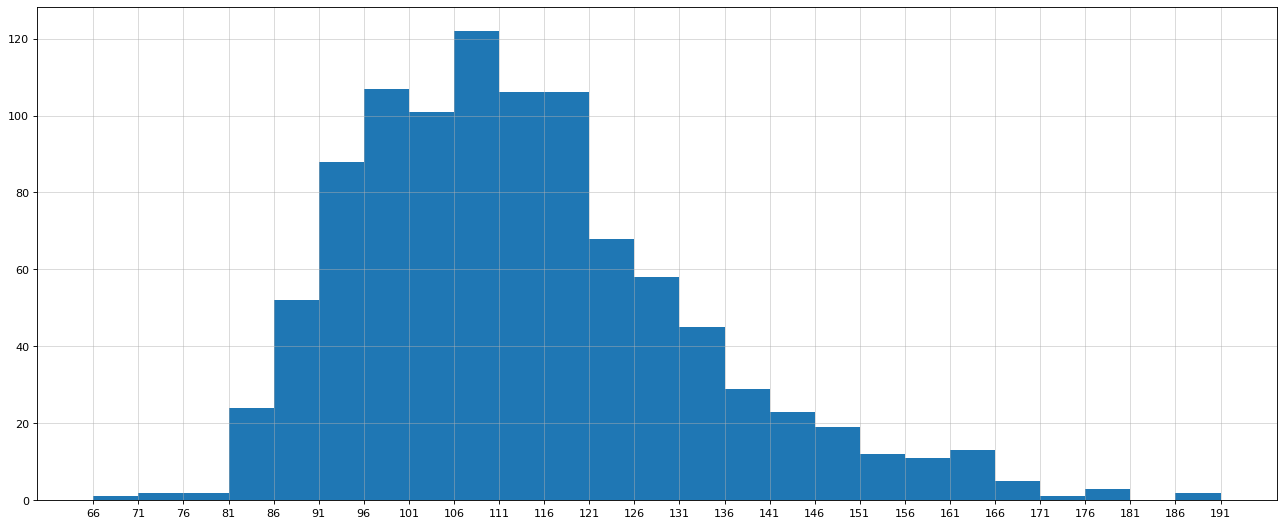

In [84]:
# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print(min_runtime,max_runtime)
# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5) #alpha是透明度
#range第三个参数是步长
plt.xticks(range(min_runtime, max_runtime + 5,5))

plt.show()

In [85]:
#电影评分的分布情况
# 获取平均评分
print(df["Rating"].mean())

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values
print(type(runtime_data))
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime) #最大值最小值电影评分

6.723199999999999
<class 'numpy.ndarray'>
--------------------------------------------------
9.0 1.9


最大评分减去最小评分为7.1
组数为14.0


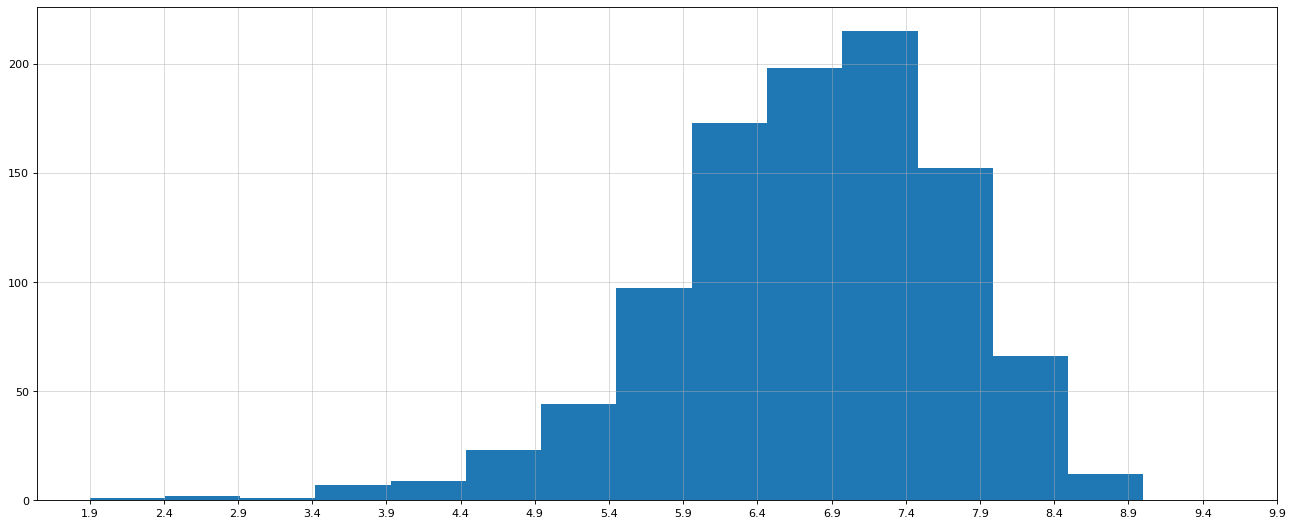

In [86]:
# 计算组数
print(f'最大评分减去最小评分为{max_runtime - min_runtime}')
num_bin = (max_runtime - min_runtime) // 0.5  #对不齐的原因是因为9.0-1.9不能整除0.5

print(f'组数为{num_bin}')
# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5)
#因为range的步长不支持0.5,自己做一个列表
_x = [min_runtime]
i = min_runtime
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x) #设置x轴的刻度

plt.show()

In [87]:
print(df["Genre"].head(3))

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object


In [88]:
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为一维
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list)) # 20个题材类型
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

20
     Animation  Music  Sci-Fi  Horror  War  Sport  Action  History  Adventure  \
0          0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
1          0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
2          0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
3          0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
4          0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
..         ...    ...     ...     ...  ...    ...     ...      ...        ...   
995        0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
996        0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
997        0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
998        0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   
999        0.0    0.0     0.0     0.0  0.0    0.0     0.0      0.0        0.0   

     Comedy  Drama  Biog

In [90]:
# 给每个电影出现分类的位置赋值1,one-hot的中文是独热码
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    #temp_list是二维列表，temp_list[i]是一个一维列表
    zeros_df.loc[i, temp_list[i]] = 1 #temp_list[i]是一个列表，里面是分类
zeros_df.head(3)

['Action', 'Adventure', 'Sci-Fi']


,Animation,Music,Sci-Fi,Horror,War,Sport,Action,History,Adventure,Comedy,Drama,Biography,Fantasy,Western,Crime,Family,Thriller,Romance,Mystery,Musical
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

Animation     49.0
Music         16.0
Sci-Fi       120.0
Horror       119.0
War           13.0
Sport         18.0
Action       303.0
History       29.0
Adventure    259.0
Comedy       279.0
Drama        513.0
Biography     81.0
Fantasy      101.0
Western        7.0
Crime        150.0
Family        51.0
Thriller     195.0
Romance      141.0
Mystery      106.0
Musical        5.0
dtype: float64


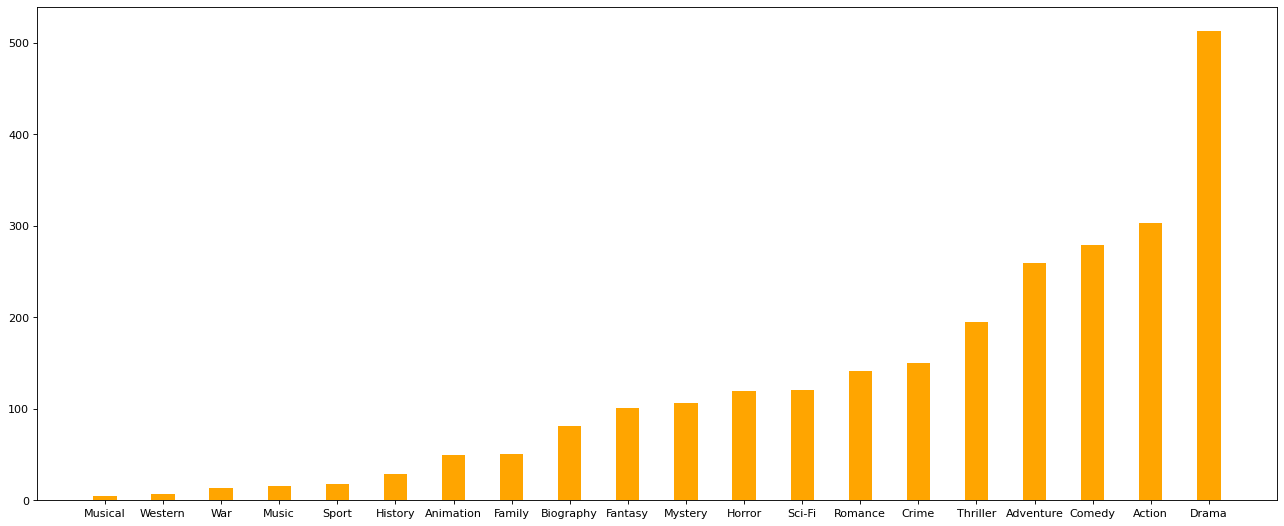

In [92]:
# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()

In [93]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
a

,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [94]:
c=a.copy()
a.index=list('abcdefg')  #a的索引变了，a.index更换索引
print(c)
# a.columns=list('ABCD')  #a的列名变了，a.columns更换列名
print('-'*50)
print(a)

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
--------------------------------------------------
   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o


In [95]:
#让某些列变为索引，让c列，d列数据变为索引
print(a)
print('-'*50)
a.set_index(['c'],inplace=True)#a没变，返回修改后的df
a

   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
--------------------------------------------------


,a,b,d
c,,,
one,0,7,h
one,1,6,j
one,2,5,k
two,3,4,l
two,4,3,m
two,5,2,n
two,6,1,o


In [97]:
a.columns

Index(['a', 'b', 'd'], dtype='object')

In [98]:

a.index

Index(['one', 'one', 'one', 'two', 'two', 'two', 'two'], dtype='object', name='c')

In [99]:
pd.date_range(start="20190101", end="20190201")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', freq='D')

In [100]:
pd.date_range(start="20250107",periods=10,freq='B')

DatetimeIndex(['2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20'],
              dtype='datetime64[ns]', freq='B')

In [101]:
pd.date_range(start="20190101",periods=10,freq='ME')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [102]:
pd.date_range(start="20190101",periods=10,freq='MS')

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [103]:
pd.date_range(start="20230710",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06',
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17'],
              dtype='datetime64[ns]', freq='W-SUN')

In [104]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 5)
s

0     3/11/2000
1     3/12/2000
2     3/13/2000
3     3/11/2000
4     3/12/2000
5     3/13/2000
6     3/11/2000
7     3/12/2000
8     3/13/2000
9     3/11/2000
10    3/12/2000
11    3/13/2000
12    3/11/2000
13    3/12/2000
14    3/13/2000
dtype: object

In [105]:
pd.to_datetime(s)

0    2000-03-11
1    2000-03-12
2    2000-03-13
3    2000-03-11
4    2000-03-12
5    2000-03-13
6    2000-03-11
7    2000-03-12
8    2000-03-13
9    2000-03-11
10   2000-03-12
11   2000-03-13
12   2000-03-11
13   2000-03-12
14   2000-03-13
dtype: datetime64[ns]

In [106]:
# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist() #二维列表
cate_list = [i[0] for i in temp_list] #i[0]就是EMS  Fire  Traffic
# print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
 #添加一列
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))

df.set_index("timeStamp", inplace=True) #设置索引，时间戳，inplace=True表示在原df上修改

df.head(10)

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
2015-12-10 16:46:48,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
2015-12-10 16:17:05,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
2015-12-10 16:51:42,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS


C:\Users\XH\AppData\Local\Temp\ipykernel_557504\3777774160.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  count_by_month = group_data.resample("M").count()["title"]  #降采样


timeStamp
2015-12-31    3898
2016-01-31    6063
2016-02-29    5413
2016-03-31    5832
2016-04-30    5684
2016-05-31    5730
2016-06-30    5720
2016-07-31    6029
2016-08-31    6005
2016-09-30    5750
2016-10-31    6039
2016-11-30    5838
2016-12-31    6024
2017-01-31    6082
2017-02-28    5417
2017-03-31    5913
2017-04-30    5780
2017-05-31    5948
2017-06-30    6030
2017-07-31    5974
2017-08-31    5882
2017-09-30    3789
Freq: ME, Name: title, dtype: int64
DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]', name='timeStamp', freq='ME')
timeStamp
2015-12-31    1095
2016-01-31    1904
2016-02-29    1868
201

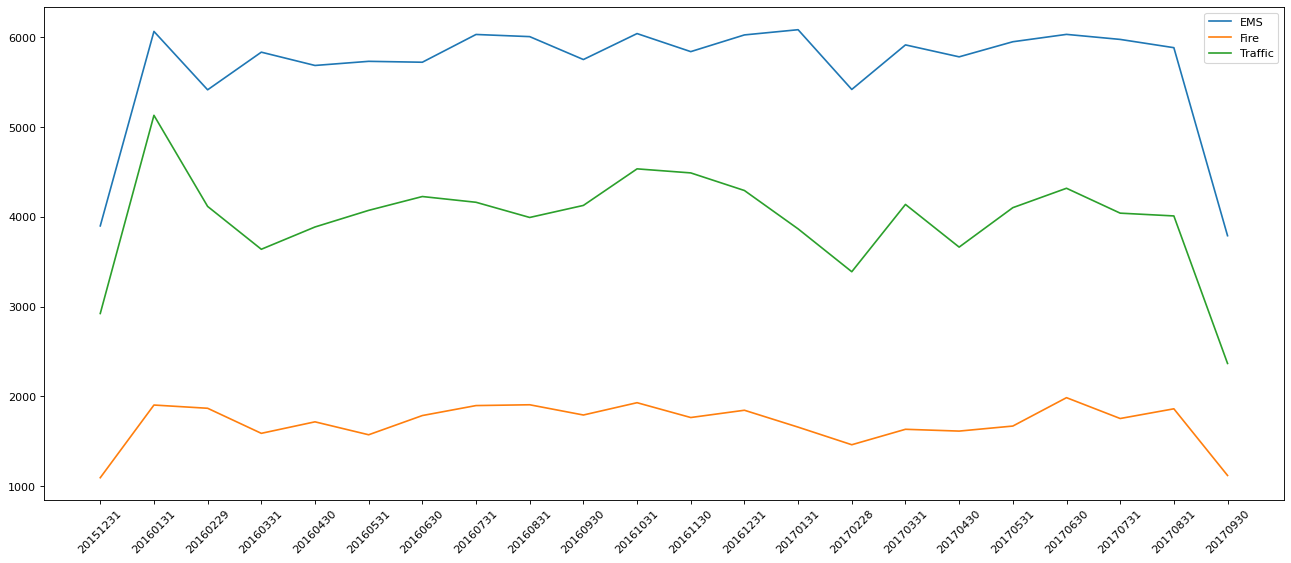

In [107]:
plt.figure(figsize=(20, 8), dpi=80)

# 分组,一图多线
#resample降采样，按月统计,索引必须是时间类型，类似groupby
for group_name, group_data in df.groupby(by="cate"):
    # 对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["title"]  #降采样
    print(count_by_month)
    # 画图
    _x = count_by_month.index
    print(_x)
    _y = count_by_month.values #values是对应事故发生次数

    _x = [i.strftime("%Y%m%d") for i in _x]  #变年月日格式

    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()